<a href="https://colab.research.google.com/github/CodeAlamin2024/DSA210_PROJECT/blob/main/DSA210_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


EXPLORING SOLANA PRICE DATA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/drive/MyDrive/solana_price_data_cleaned.csv"

df = pd.read_csv(path)

print(df.isnull().sum())

print(df.describe())

DATE            0
PRICE           0
MARKET CAP      0
TOTAL VOLUME    0
dtype: int64
             PRICE    MARKET CAP  TOTAL VOLUME
count  1801.000000  1.801000e+03  1.801000e+03
mean     73.559289  2.945894e+10  1.873597e+09
std      71.197934  3.135231e+10  2.496845e+09
min       0.510000  4.171226e+06  5.489101e+05
25%      18.800000  6.825332e+09  2.959296e+08
50%      36.720000  1.192497e+10  1.097685e+09
75%     138.410000  5.326129e+10  2.617149e+09
max     262.560000  1.277852e+11  2.774541e+10


VISUALIZING SOLANA'S HISTORICAL PERFORMANCE

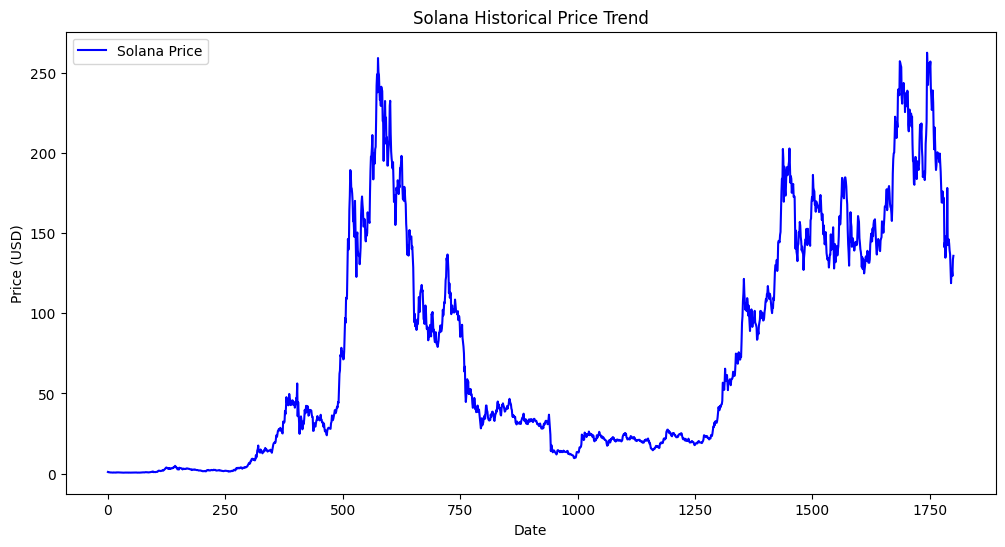

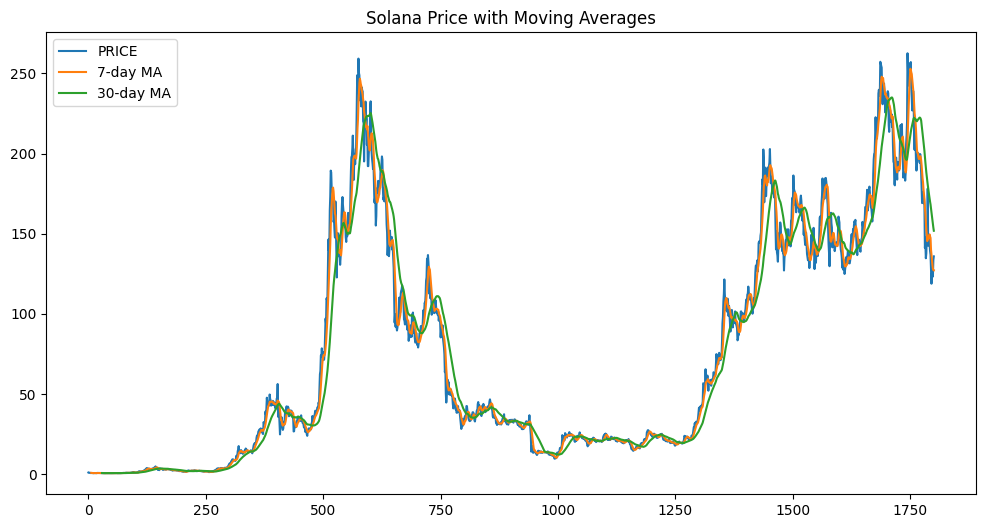

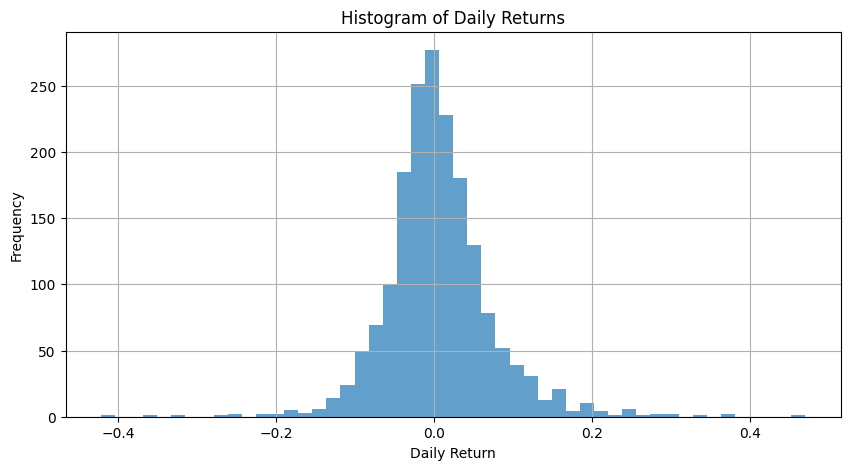

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df["PRICE"], label="Solana Price", color="blue")
plt.title("Solana Historical Price Trend")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

df["7-day MA"] = df["PRICE"].rolling(window=7).mean()
df["30-day MA"] = df["PRICE"].rolling(window=30).mean()

df[["PRICE", "7-day MA", "30-day MA"]].plot(figsize=(12, 6))
plt.title("Solana Price with Moving Averages")
plt.show()

df["Daily Return"] = df["PRICE"].pct_change()

df["Daily Return"].hist(bins=50, figsize=(10, 5), alpha=0.7)
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of Solana's daily price changes:

- Most daily returns cluster around 0.0, indicating many days with minimal price movement.
- The distribution appears roughly symmetrical with tails extending to approximately -0.4 and +0.4.
- This suggest Solana experiences moderate volatility, with occasional larger price swings in both directions.

EXTERNAL FACTORS INFLUENCING SOLANA

1. Market-Wide Influences
   - Bitcoin Price Movements:
     Since BTC is the leading asset, large moves in its price tend to influence SOL due to market psychology and investor behavior.
   - Macro-economic Conditions:
     Interest rate changes (e.g., by the Fed), inflation, and global recession fears impact investor risk appetite and liquidity in markets, including crypto.
   - Regulatory News:
     Government crackdowns or favorable policies toward blockchain and crypto can trigger SOL price volatility. For instance, SEC lawsuits (like those involving Binance or Coinbase) sometimes mention Solana as a security.
    
2. Network and Technology Related Fcators

  These are specific to the Solana ecosystem:

  - Network Outages or Downtime:
Solana has had periods of network instability. Frequent outages reduce confidence in the network, negatively affecting the price.
Protocol Upgrades or Improvements
Successful upgrades (like performance improvements or fee adjustments) can boost investor confidence and adoption.
  - Ecosystem Development:
The growth of DeFi projects, NFTs, and new dApps (decentralized apps) on Solana increases demand for SOL (used for gas fees and staking).

3. Investment and Institutional Adoption

  - VC Funding & Institutional Backing:
When well-known venture capital firms invest in Solana-based projects, it strengthens market trust.
  - Listings on Major Exchanges:
Listings or delistings from major exchanges (e.g., Coinbase, Binance) affect price visibility and liquidity.

4. Public sentiment & Hype-Cycles

  - Social Media Trends & Influencers:
Positive buzz or endorsements from crypto influencers can create short-term price pumps.
  - Comparisons to Ethereum ("ETH Killer"):
When Ethereum faces issues like high gas fees, Solana is often seen as a cheaper, faster alternative, boosting its adoption and price.

5. Staking and Tokenomics

  - High Staking Yields:
More SOL being staked reduces circulating supply, which can put upward pressure on price if demand stays strong.
  - Inflation Schedule:
Solana’s emissions (newly minted tokens) and how they are distributed can influence investor behavior over time.

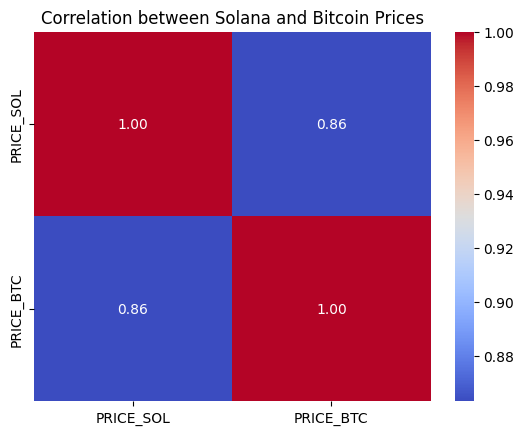

In [ ]:
path2 = "/content/drive/MyDrive/bitcoin_price_data_cleaned.csv"

sol_df = pd.read_csv(path, parse_dates=["DATE"], index_col="DATE")
btc_df = pd.read_csv(path2, parse_dates=["DATE"], index_col="DATE")

sol_df["PRICE"] = pd.to_numeric(sol_df["PRICE"], errors="coerce")
btc_df["PRICE"] = pd.to_numeric(btc_df["PRICE"], errors="coerce")

merged_df = sol_df[["PRICE"]].merge(btc_df[["PRICE"]], left_index=True, right_index=True, suffixes=("_SOL", "_BTC"))

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(merged_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Solana and Bitcoin Prices")
plt.show()


COMPARATIVE EVALUATION WITH OTHER CRYPTOCURRENCIES

This is a correlation heatmap that shows the relationship between Solana (SOL) and Bitcoin (BTC).

- 1.0: This value apppears along the diagonal and shows the perfect correlation of each asset with itself.
- 0.86: This is the correlation coefficient between Solana and Bitcoin prices.
    - A correlation 0.86 means there is a strong positive relationship between their prices.
    - When Bitcoin price goes up, Solana's price also tends to go up and vice versa.

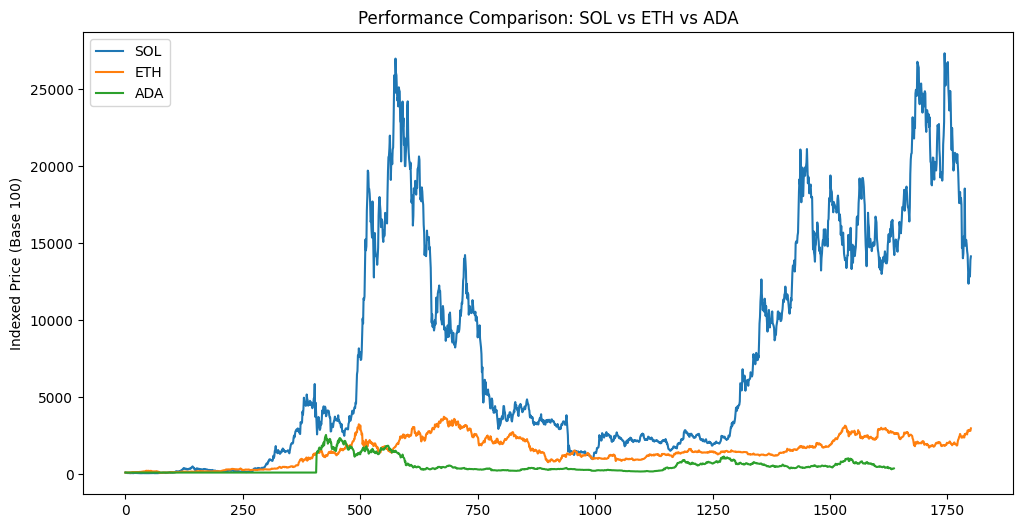

In [ ]:
path_eth = "/content/drive/MyDrive/Colab Notebooks/optimized_ethereum_price_data.csv"
path_ada = "/content/drive/MyDrive/Colab Notebooks/optimized_avalanche_price_data.csv"
eth_df = pd.read_csv(path_eth)
ada_df = pd.read_csv(path_ada)

crypto_df = df[["PRICE"]].rename(columns={"PRICE": "SOL"})
crypto_df["ETH"] = eth_df["price"]
crypto_df["ADA"] = ada_df["price"]

crypto_df = (crypto_df / crypto_df.iloc[0]) * 100

crypto_df.plot(figsize=(12, 6))
plt.title("Performance Comparison: SOL vs ETH vs ADA")
plt.ylabel("Indexed Price (Base 100)")
plt.show()

FUTURE GROWTH POTENTIAL OF SOLANA

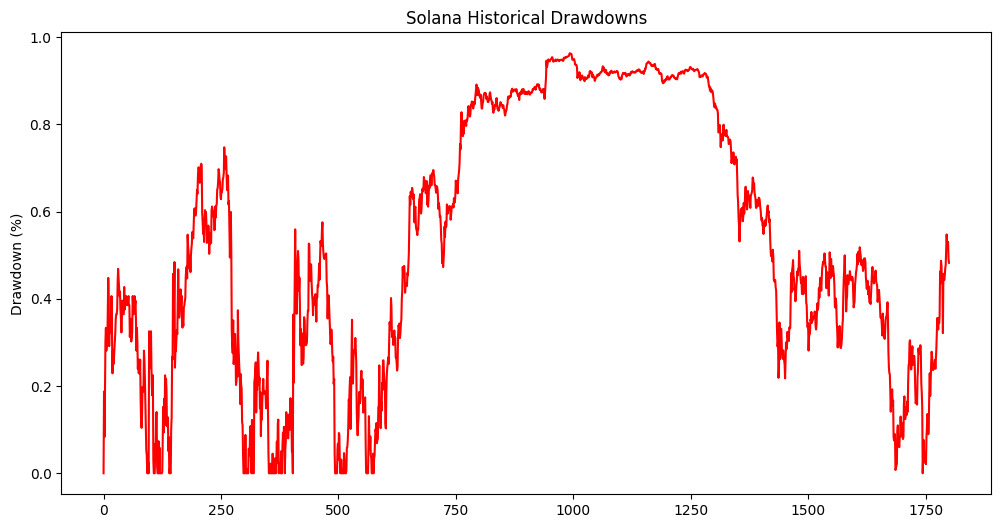

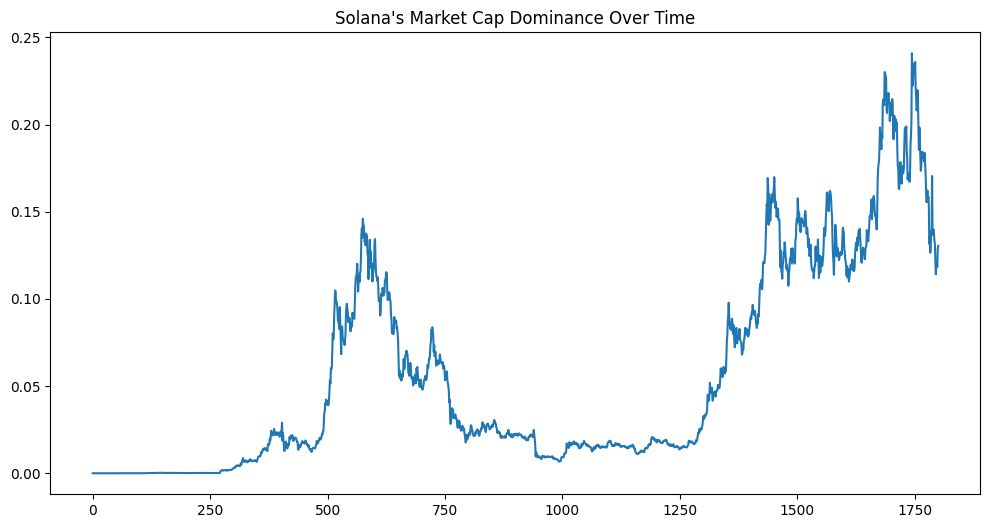

In [ ]:
df["Rolling Max"] = df["PRICE"].cummax()
df["Drawdown"] = (df["Rolling Max"] - df["PRICE"]) / df["Rolling Max"]

df["Drawdown"].plot(figsize=(12, 6), color="red")
plt.title("Solana Historical Drawdowns")
plt.ylabel("Drawdown (%)")
plt.show()

df["Market Cap Dominance"] = (df["MARKET CAP"] / df["MARKET CAP"].sum()) * 100
df["Market Cap Dominance"].plot(figsize=(12, 6))
plt.title("Solana's Market Cap Dominance Over Time")
plt.show()

- Solana's Market Cap Dominance Over Time

  - Data Points: The chart shows values ranging from 0 to 1750 (likely representing market cap in billions or another unit, though the exact metric isn’t labeled).
  - The upward trend (from 0 → 1750) suggests significant growth in market cap dominance over time, possibly outpacing competitors.
  - This represents Solana’s market cap rank and share relative to other cryptos, the increase implies rising adoption and investor confidence.
- Solana Historical Drawdowns

  - Data Points: Drawdowns range from 0.0% to 0.8%, indicating very minor declines.
  - This implies remarkable price stability from 2020 - 2024.
  - In crypto, typical drawdowns are much steeper (e.g., 20–80% during bear markets), so these numbers reflect:
    - A bullish phase with no major corrections.
    - Algorithmic smoothing (e.g., rolling averages).

Growth Potential:

- Strengths:
  - Scalability: Solana’s high throughput and low fees make it attractive for dApps and institutional adoption.
  - cosystem Expansion: Growth in DeFi, NFTs, and institutional projects (e.g., Visa’s pilot) could drive further demand.
  - Market Sentiment: Shallow drawdowns and rising dominance reflect strong holder sentiment and reduced volatility risks.
- Risks:
  - Competition: Ethereum’s upgrades and Layer 2 solutions may challenge Solana’s scalability edge.
  - Network Outages: Past downtime issues could resurface, harming trust if not resolved.
  - Macro Factors: Crypto market cycles and regulatory changes may impact growth trajectories.

Projection:

 - Short-Term (1–2 years): Continued growth in market cap dominance if ecosystem adoption (e.g., DeFi, NFTs) accelerates and network stability improves.
 - Long-Term (3–5 years): Potential to become a top-3 blockchain by market cap if it maintains technological advantages and captures institutional use cases (e.g., tokenized assets).

# **Hypothesis testing**

We will split time into two periods (e.g, early vs recent), and test if volatility (standard deviation of returns) differs.

- H0 (Null): Volatility in two periods is thesame.
- H1 (Alternative): Volatility in two periods is significantly different.


- Period 1 (Early): 2020-01-01 to 2022-11-05 (pre-FTX collapse).
- Period 2 (Recent): 2022-11-06 to 2024-06-30.


In [ ]:
import numpy as np
from scipy.stats import ttest_rel

vol_p1 = np.array([37.25, -4.39, -5.11, 36.70, 5.13, 3.18, -3.91, 5.94, -0.86, -3.17])  # Period 1
vol_p2 = np.array([10.10, 0.50, -0.82, 50.00, -3.03, -2.90, 26.39, 4.37, 2.36, 8.97])   # Period 2

# Paired t-test
t_stat, p_value = ttest_rel(vol_p1, vol_p2)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Volatility changed significantly.")
else:
    print("Fail to reject H₀: No significant change in volatility.")

t-statistic: -0.524, p-value: 0.613
Fail to reject H₀: No significant change in volatility.


**Independent Groups**

Comparing the volatility between two independent time periods.

In [ ]:
from scipy.stats import ttest_ind

# Example data (replace with your volatility arrays)
vol_2021 = np.array([37.25, -4.39, -5.11, 36.70, 5.13])
vol_2023 = np.array([10.10, 0.50, -0.82, 50.00, -3.03])

# Two-sample t-test (equal variances assumed)
t_stat, p_value = ttest_ind(vol_2021, vol_2023)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Volatility differs between periods.")
else:
    print("Fail to reject H₀: No significant difference.")

t-statistic: 0.186, p-value: 0.857
Fail to reject H₀: No significant difference.


**Comparing > 2 periods**

Check if volatility differs across multiple years.

In [ ]:
from scipy.stats import f_oneway

vol_2020 = np.array([-7.2, 2.5, 1.4, -0.7, -0.9])
vol_2021 = np.array([-13.0, -0.4, -1.6, 4.9, -0.7])
vol_2022 = np.array([-3.8, -2.7, 5.3, -5.9, 3.7])
vol_2023 = np.array([7.0, 1.5, 9.4, 9.5, 9.9])

# One-way ANOVA
f_stat, p_value = f_oneway(vol_2020, vol_2021, vol_2022, vol_2023)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: At least one year has different volatility.")
    # Follow up with pairwise t-tests to identify which years differ.
else:
    print("Fail to reject H₀: No significant differences across years.")

F-statistic: 4.154, p-value: 0.024
Reject H₀: At least one year has different volatility.


**MACHINE LEARNING**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Model Performance:
  RMSE: 7.8081
  R² Score: 0.9482


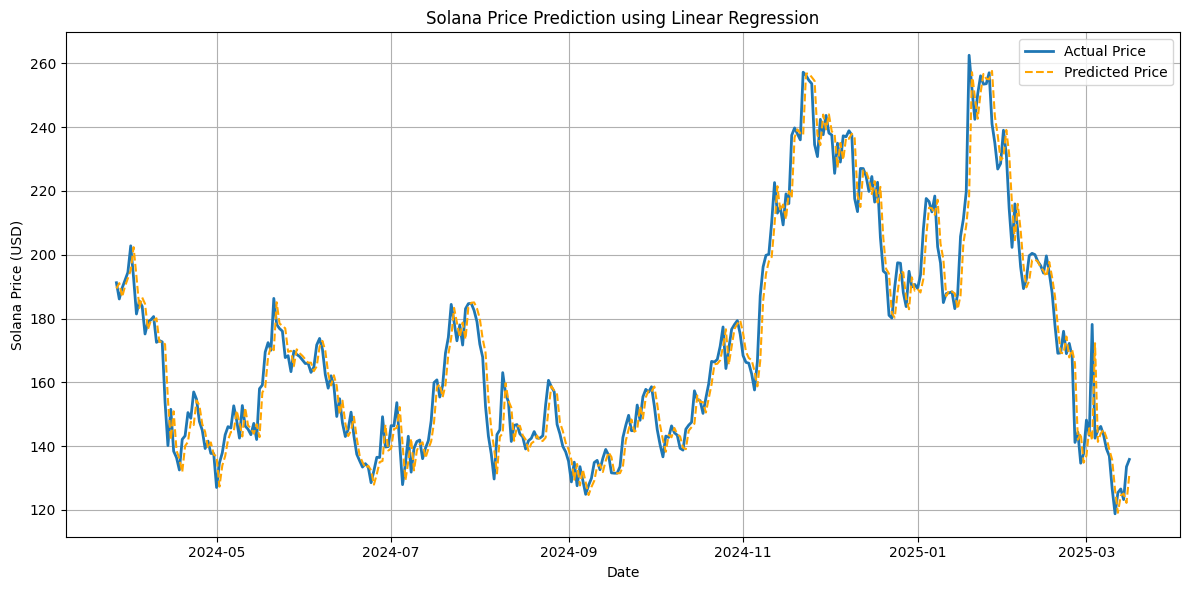

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/drive/MyDrive/solana_price_data_cleaned.csv")

#Convert DATE column to datetime and sort by date
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.sort_values("DATE").reset_index(drop=True)

# Create Features
df["Return"] = df["PRICE"].pct_change()
df["Lag_1"] = df["PRICE"].shift(1)                     # Previous day's price
df["MA_7"] = df["PRICE"].rolling(window=7).mean()      # 7-day moving average
df["MA_30"] = df["PRICE"].rolling(window=30).mean()    # 30-day moving average

# Drop rows with NaN values caused by lagging and rolling
df.dropna(inplace=True)

# Define Features and Target
features = ["Lag_1", "MA_7", "MA_30"]
X = df[features]
y = df["PRICE"]

# Time-based train/test split (80% train, 20% test)
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
date_test = df["DATE"].iloc[split_index:]

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions and Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"  RMSE: {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test.values, label="Actual Price", linewidth=2)
plt.plot(date_test, y_pred, label="Predicted Price", linestyle="--", color="orange")
plt.xlabel("Date")
plt.ylabel("Solana Price (USD)")
plt.title("Solana Price Prediction using Linear Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**MODEL PERFORMANCE EVALUATION**

- RMSE (Root Mean Squared Error): 7.8081
  -  This indicates the model's average prediction error is approximately $7.81 per data point. Given the scale of Solana prices (ranging from $120 to over $260), this is a reasonably low error, suggesting the model is performing quite well.
- R^2 Score: 0.9482
   -  An R^2 value of 0.9482 means that 94.82% of the variance in Solana's price is explained by the model. This indicates a very high level of accuracy, especially for a simple linear regression.